# Selecting the number of clusters with silhouette analysis on KMeans clustering


- silhouette
    - 실루엣 분석은 클러스터링 결과간의 분리 거리를 연구하는 데 사용될 수 있다.
    - 실루엣 플롯은 한 클러스터의 각 점이 인접 클러스터 점들과 얼마나 가까운 지 측정하는 값을 표시한다. $\rarr$ 측정값의 범위는 -1에서 1까지이다.
    - 1에 가까운 실루엣 계수는 샘플이 인접한 클러스터로부터 멀리 떨어져 있음을 나타낸다.
    - 0의 값은 샘플이 두 개의 인접한 클러스터 간의 결정 경꼐 에 있거나 매우 가까운것을 나타낸다.
    - 음수 값은 해당 샘플이 잘못된 클러스터에 할당되었을 수 있음을 나타낸다.
#
- 여기서는 실루엣 분석을 사용하여 `n_clusters`의 최적값을 선택한다.
- 실루엣 플롯은 평균 이하의 실루엣 점수를 가진 클러스터가 존재하고 실루엣 플롯의 크기가 크게 변동하기 때문에 `n_clusters` 값 3, 5, 6이 주어진 데이터에 좋지 않다는 것을 보여준다.
#
- 실루엣 프롯의 두께에서 클러스터 크기를 시각화 할 수 있다.
- `n_clusters`가 2와 같을 때 클러스터의 0의 실루엣 플롯은 3개의 하위 클러스터가 하나의 큰 클러스터로 그룹화되어 크기가 더 크다. 
- `n_clusters`가 4와 가틍면 모든 플롯은 거의 비슷한 두께를 가지므로 오른쪽의 레이블이 지정된 산점도에서 보듯이 크기가 비슷하다.

For n_clusters =  2 The average silhouette_score is : 0.7049787496083261
For n_clusters =  3 The average silhouette_score is : 0.5882004012129721
For n_clusters =  4 The average silhouette_score is : 0.6505186632729437
For n_clusters =  5 The average silhouette_score is : 0.561464362648773
For n_clusters =  6 The average silhouette_score is : 0.4857596147013468


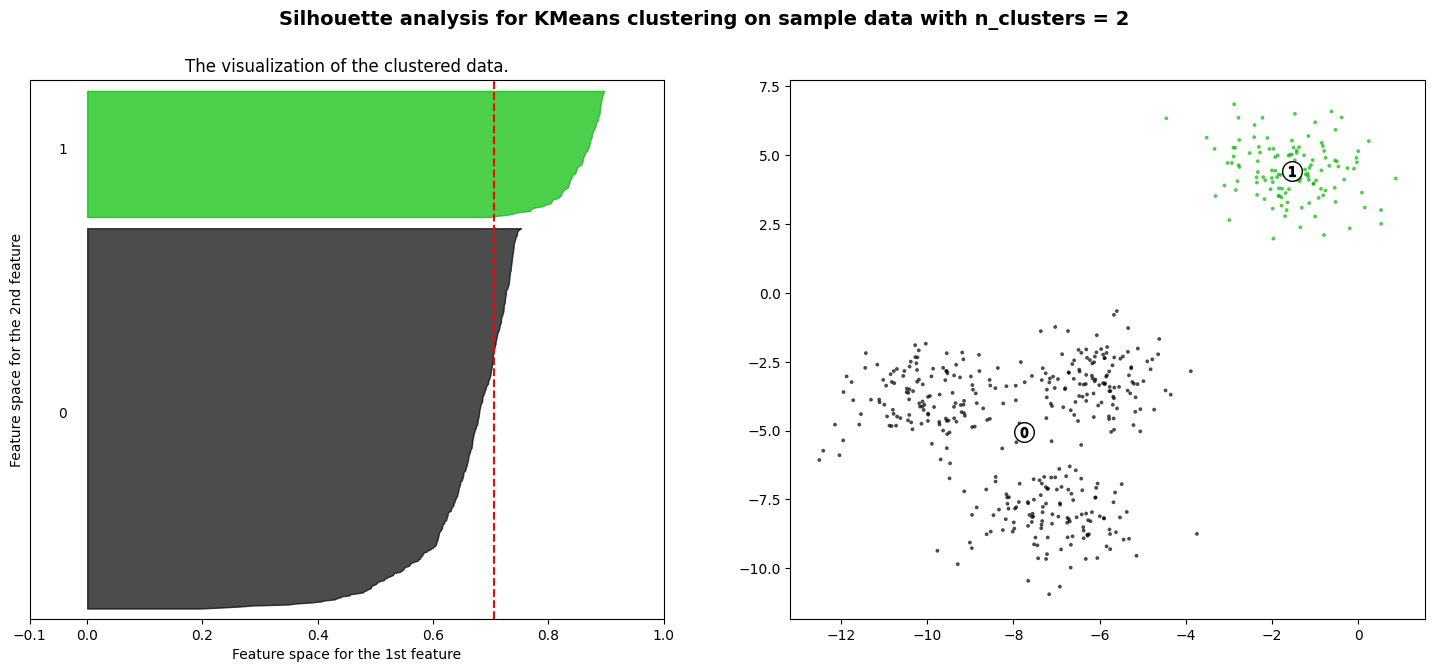

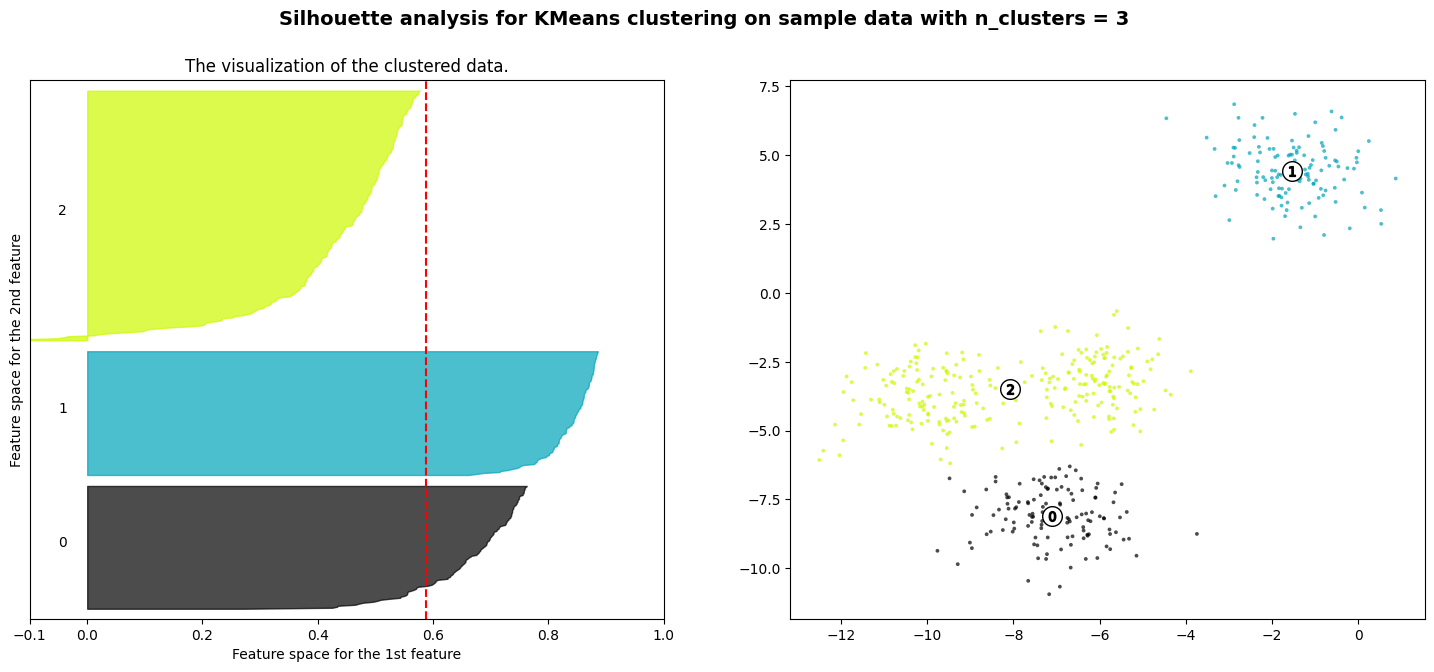

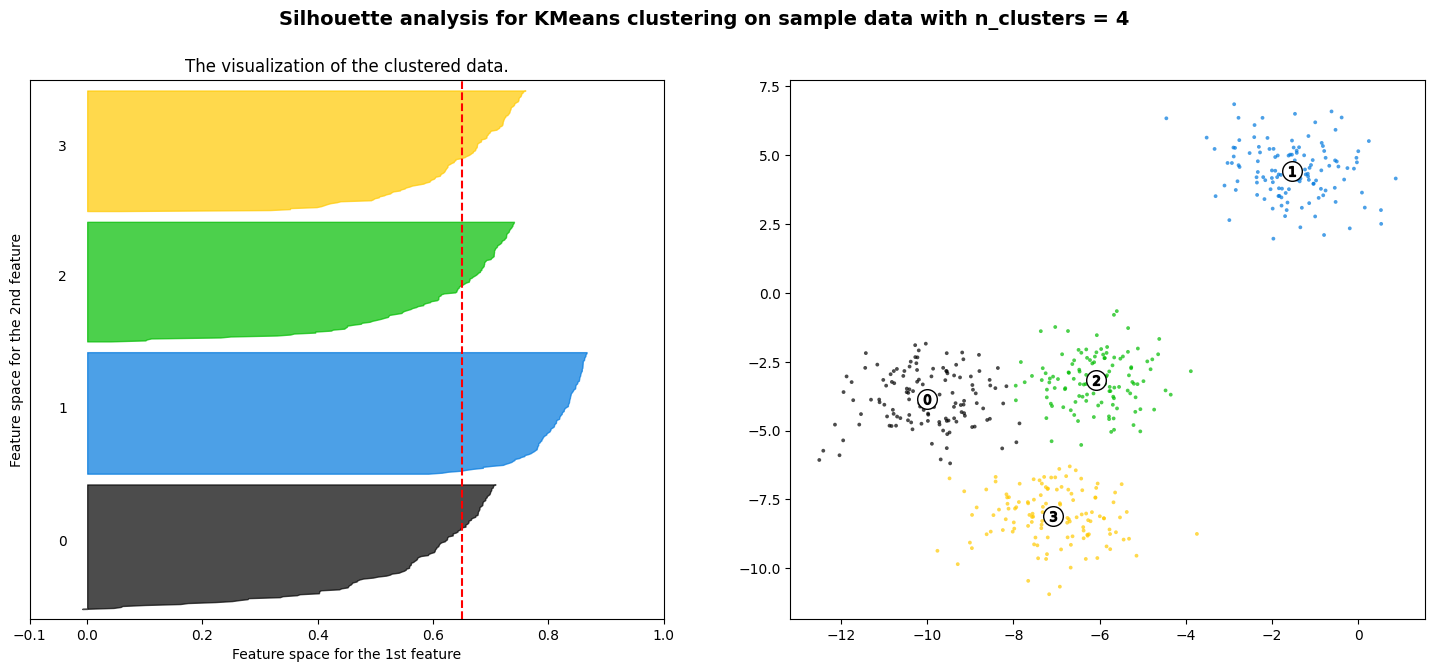

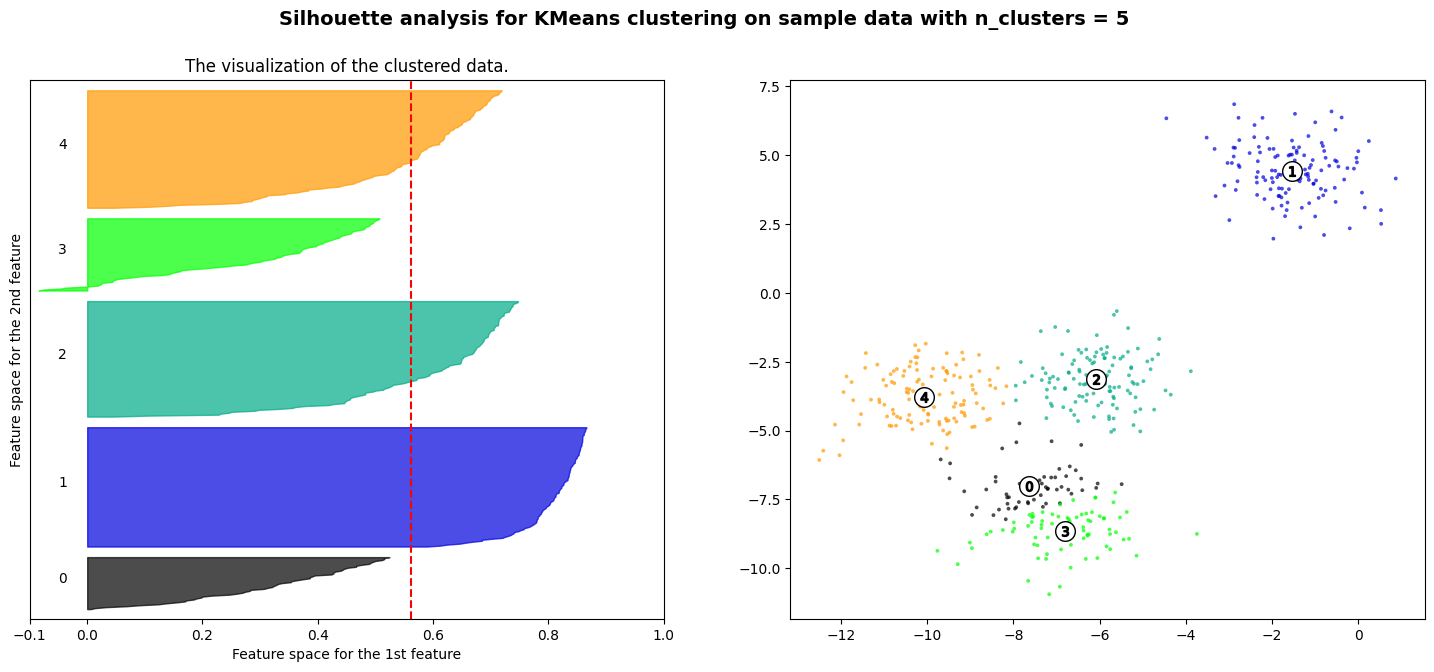

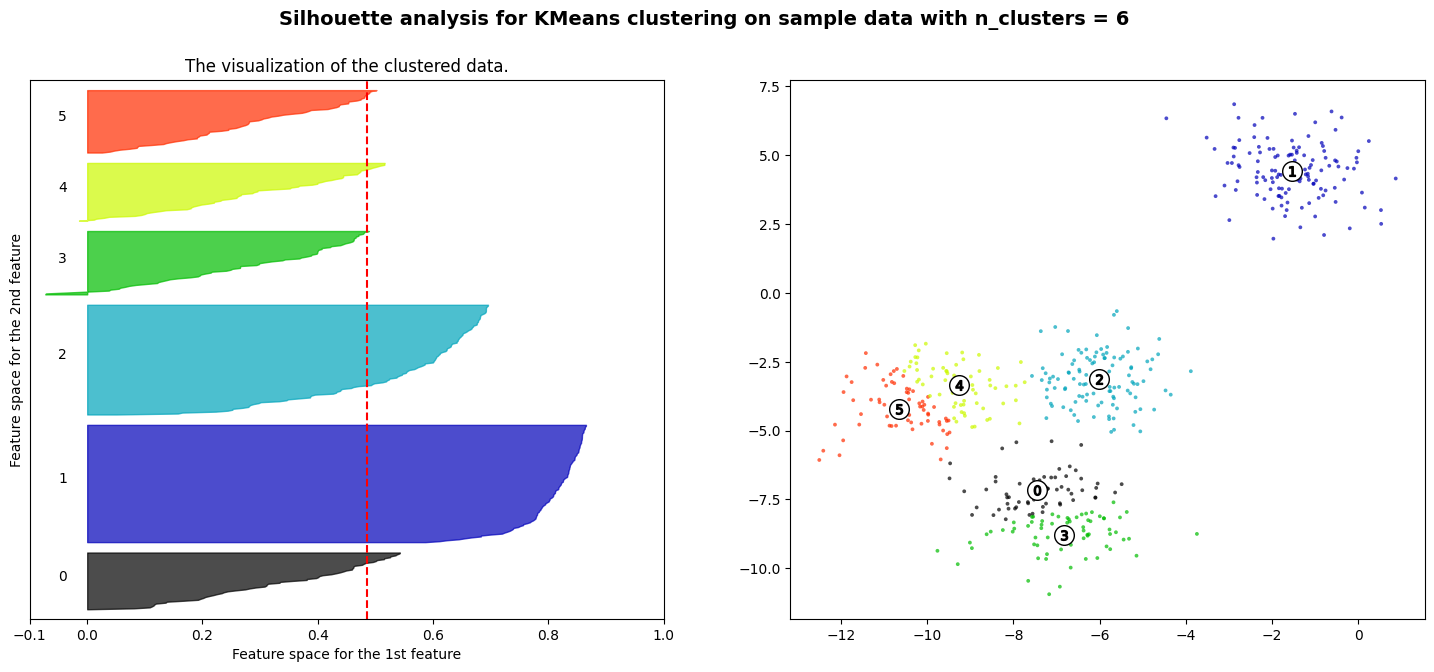

In [2]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# make_blobs 함수를 사용하여 샘플 데이터를 생성한다. 이 특정 설정은 하나의 뚜렷한 클러스터와 3개의 클러스터를 가깝게 배치한다.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1
)   # 재생산성을 위해서 

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # 1개의 열과 2개의 행을 가진 subplot 생성
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 첫 번째 서브플롯은 실루엣 플롯이다.
    # 실루엣 계수는 -1에서 1까지의 범위를 가질 수 있지만 이 예에선 모두 [-0.1, 1] 내에 있다.
    ax1.set_xlim([-0.1, 1])
    # (n_clusters + 1)*10은 개별 클러스터의 실루엣 플롯 사이에 빈 공간을 삽입하여 명확하게 구분하기 위한 것이다.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # 클러스터링 결과를 재현할 수 있도록 n_clusters 값과 10의 난수 발생기 시드를 사용하여 클러스터러를 초기화한다.
    clusterer = KMeans(n_clusters=n_clusters, n_init='auto', random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # silhouette_score는 모든 샘플에 대한 평균값을 제공한다.
    # 이는 형성된 클러스터의 밀도와 분리를 파악하는 관점이다.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        'For n_clusters = ',
        n_clusters,
        'The average silhouette_score is :',
        silhouette_avg,
    )

    # 각 샘플에서 silhouette_score를 계산한다.
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # 클러스터 i에 속하는 샘플의 silhouette_score를 집계하고 정렬한다.
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # 실루엣 플롯의 클러스터 가운데 클러스터 숫자를 나타낸다.
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 다음 플롯을 위해서 새로운 y_lower을 계산한다.
        y_lower = y_upper + 10

    ax1.set_title('The silhouette plot for the various clusters.')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster label')

    # 모든 값의 silhouette_score, silhouette_avg을 위해 수직선을 긋는다.
    ax1.axvline(x=silhouette_avg, color='red', linestyle='--')

    ax1.set_yticks([])  # y축 레이블과 눈금을 제거 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2번째 플롯은 실제 클러스터가 형성된 모습을 보여준다.
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k'
    )

    # 클러스터 라벨링
    centers = clusterer.cluster_centers_
    # 클러스터 센터에 휜색 동그라미를 그린다.
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker='o',
        c='white',
        alpha=1,
        s=200,
        edgecolor='k'
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' %i, alpha=1, s=50, edgecolor='k')

    ax1.set_title('The visualization of the clustered data.')
    ax1.set_xlabel('Feature space for the 1st feature')
    ax1.set_ylabel('Feature space for the 2nd feature')

    plt.suptitle(
        'Silhouette analysis for KMeans clustering on sample data with n_clusters = %d'
        % n_clusters,
        fontsize=14,
        fontweight='bold'
    )

plt.show()